# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **and nothing else** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ **From this week on, we will deduct a point if you zip/tar/archive the notebook, especially if you include the data folder!** 
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, `Data/wine.mat`

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1a) (3pts)
1. Load the data into Python using the `scipy.io.loadmat()` function. 
2. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. Use subplotting to nicely visualize these plots.
3. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. This means that you should remove the entire sample from the dataset, not just for that attribute!
4. Plot new box plots and histograms for these attributes and compare them with initial ones.

> 
 + *You can use the `scipy.stats.zscore()` to standardize your data before you plot a boxplot.*
 + *You can use logical indexing to easily make a new dataset (for example $X\_filtered$, where the outliers are removed. This is much easier, and faster than methods like dropping, or selecting using a for loop or list comprehension. For more information, see: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html Take a look at the -Boolean or "mask" index arrays- section.*
 + *You can use the function `matplotlib.pyplot.subplots()` to plot several plots in one figure. A simple example an be found at: https://matplotlib.org/2.0.2/examples/pylab_examples/subplots_demo.html, take a look at the 2D subplot specifically. There is also an example of a subplot in the first assignment. If you're handy, you can devise a for loop which fills up the subplot area!* 
 + *The object in wine.mat is a dictionary. The attributes are stored in matrix $X$. Attribute names and class names are stored in the attributeNames object, which contain arrays, of which the first element contains the names*

**Make sure to take a look at the documentation of functions before you try and use them!**


Starting to print the unaltered data!


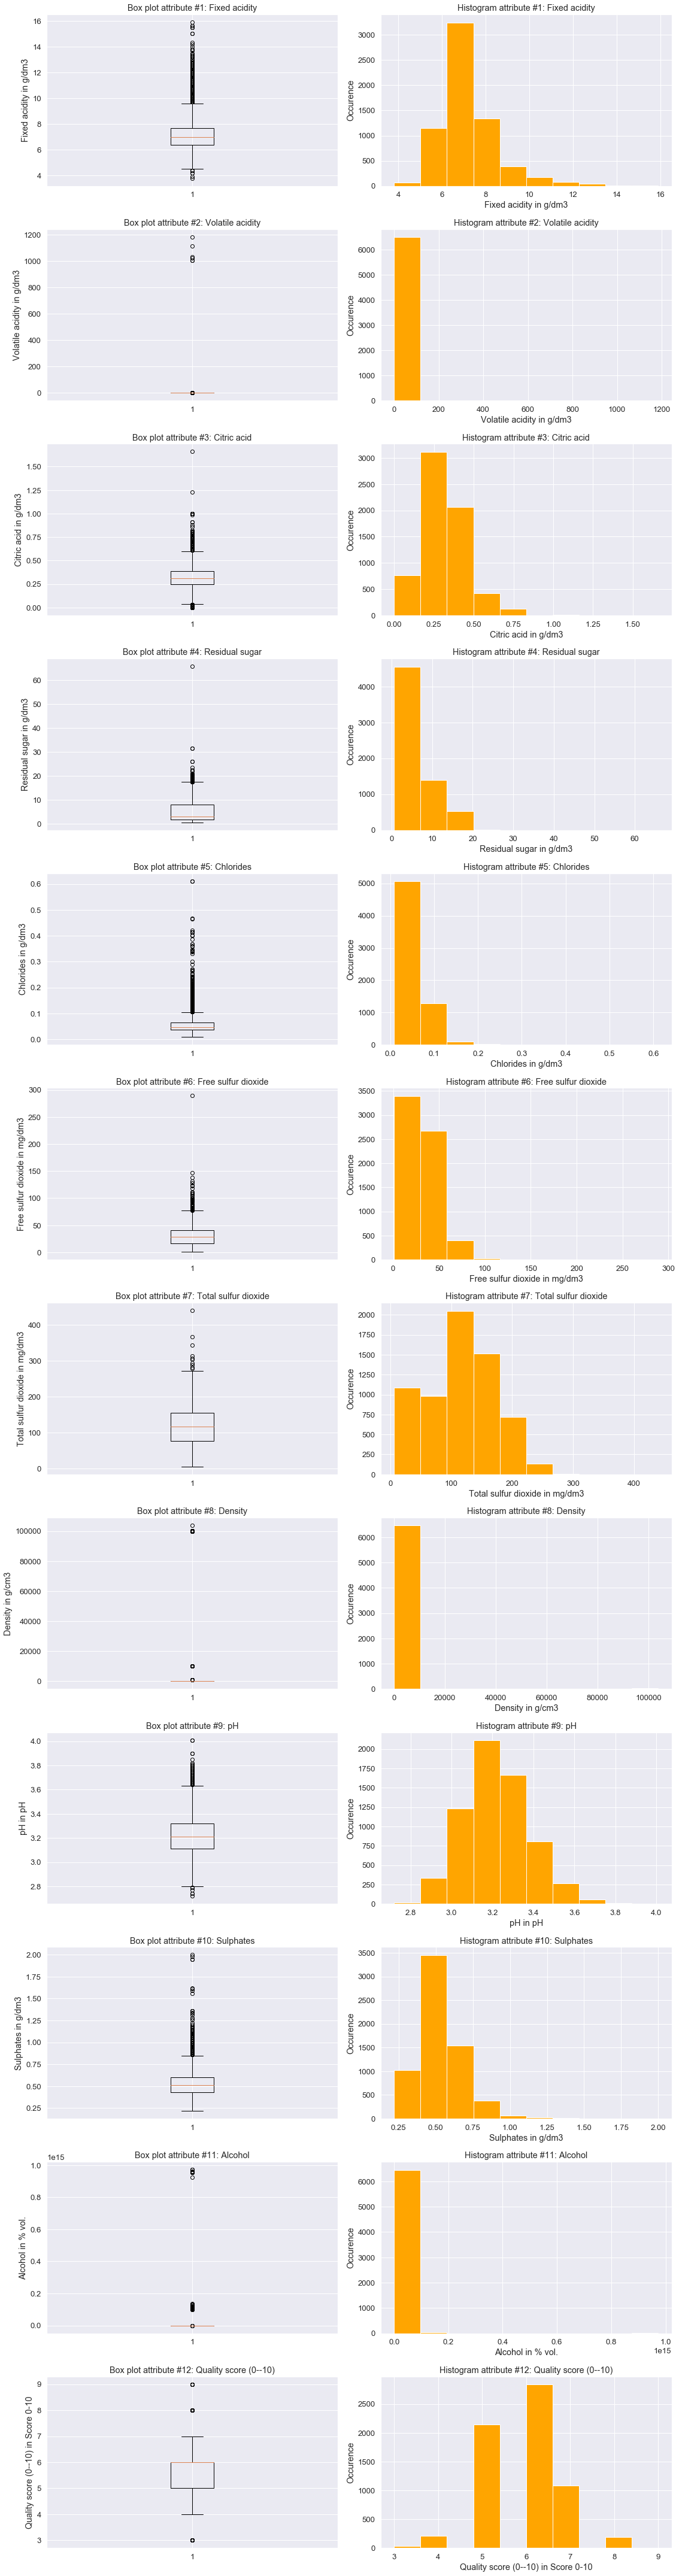

Figure 1: Plots of the unaltered wine data. Many outliers are evident.
Starting to print the unaltered standardized data!


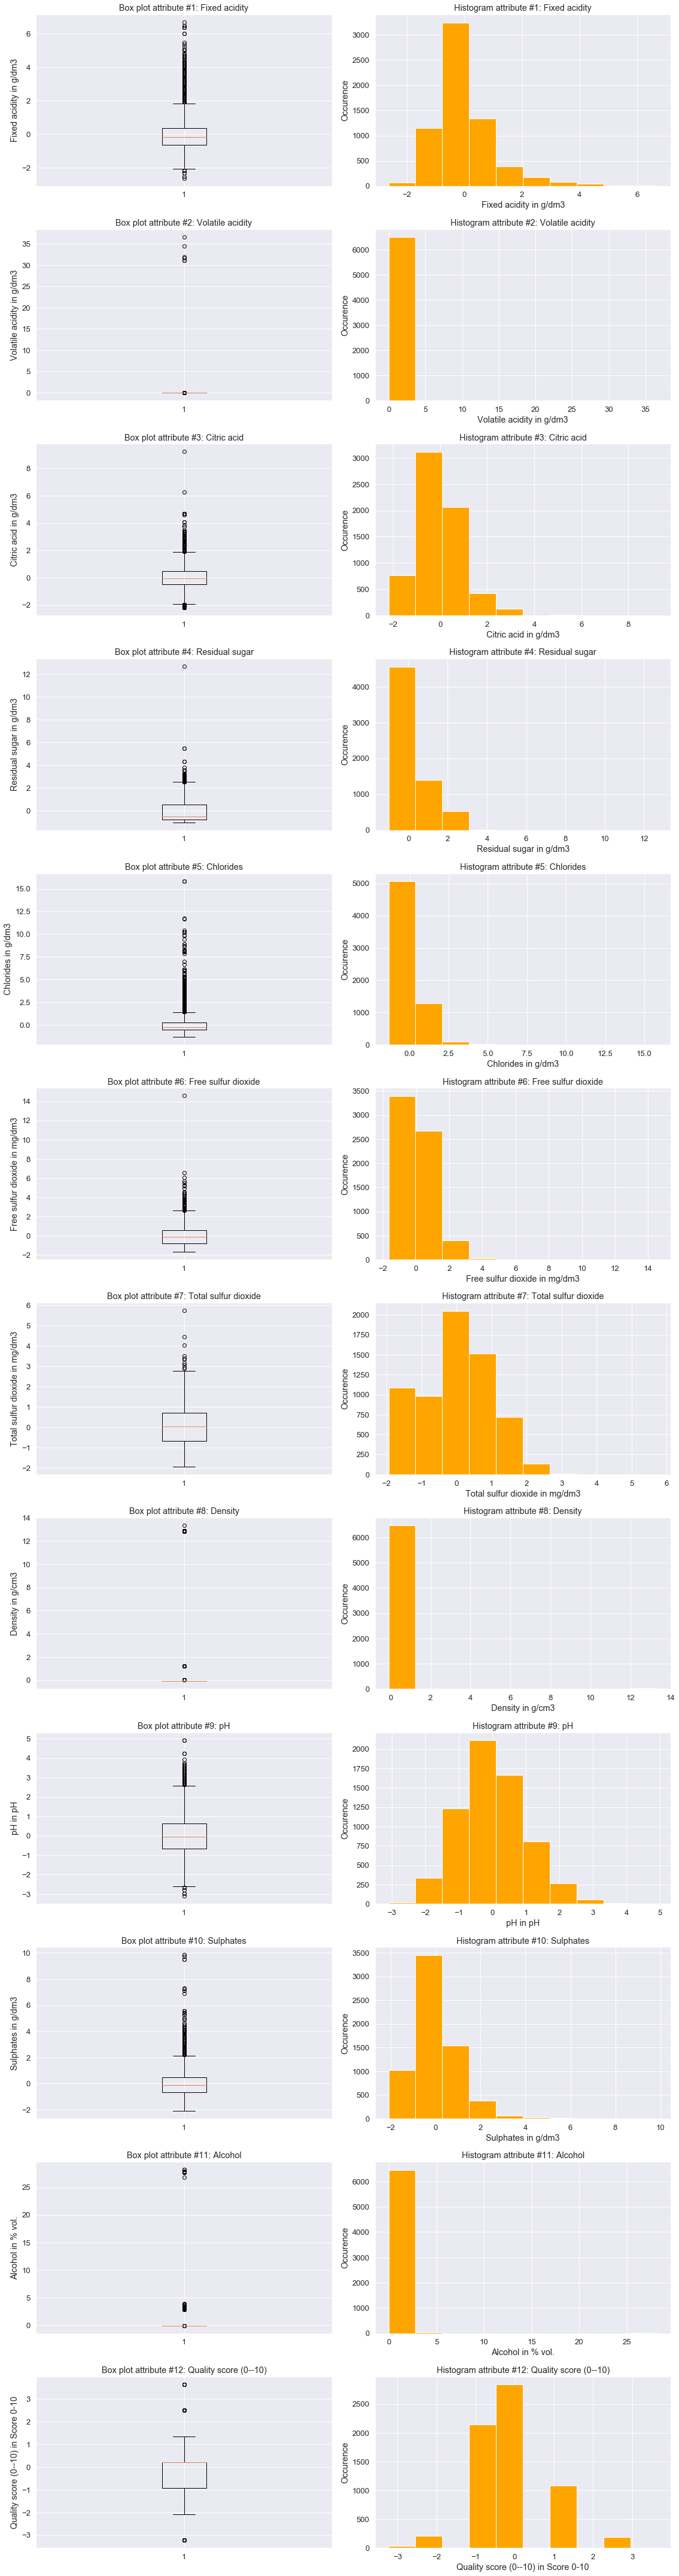

Figure 2: Plots of the unaltered STANDARDIZED wine data. The outliers are exaggerated even more.
Starting to print the altered data of volatile acidity, density and alcohol levels.


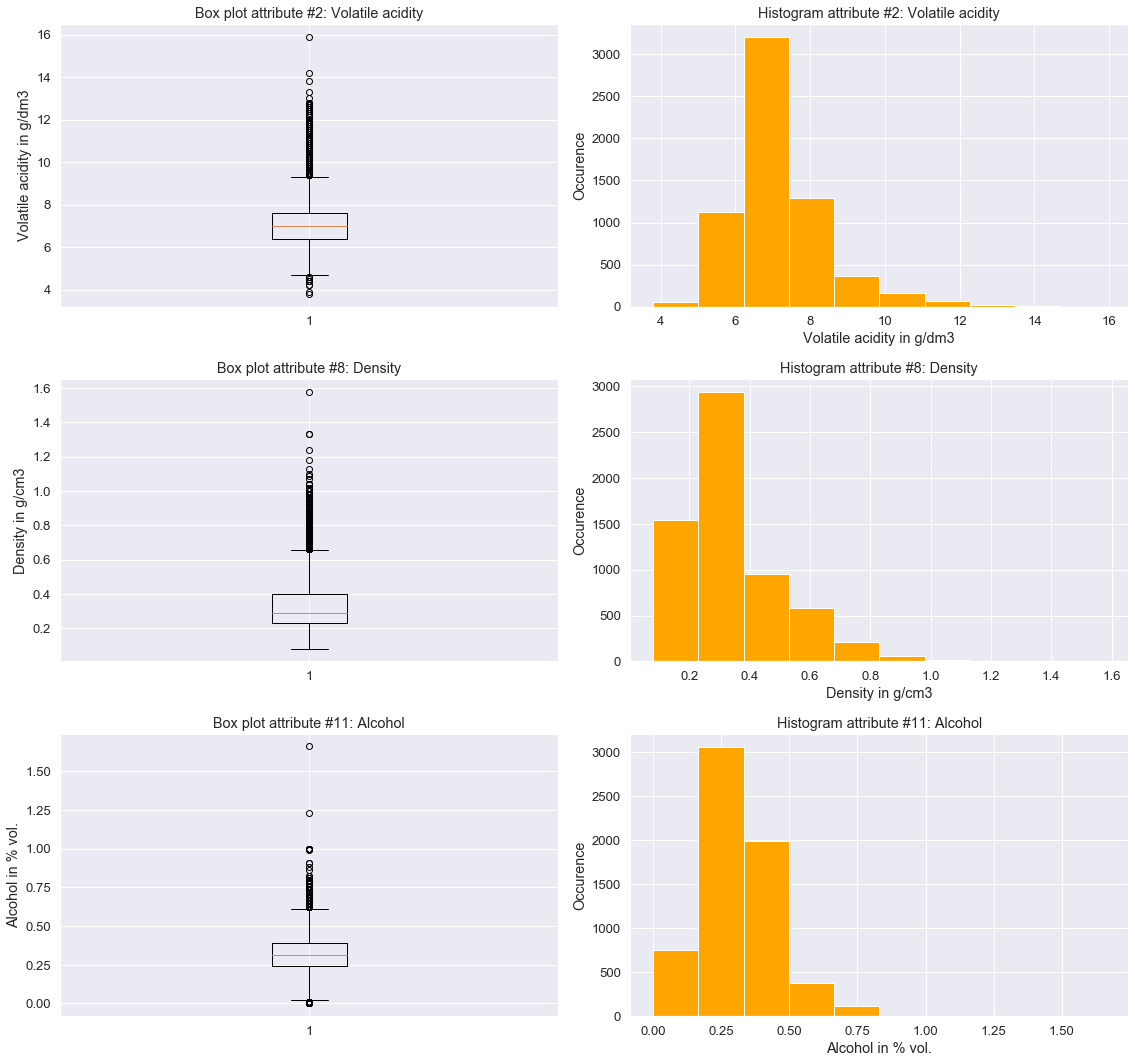

Figure 3: Plots of the wine data with removed outliers. Distinct difference with the attributes that did not have the outliers removed.
Starting to print the altered STANDARDIZED data of volatile acidity, density and alcohol levels.


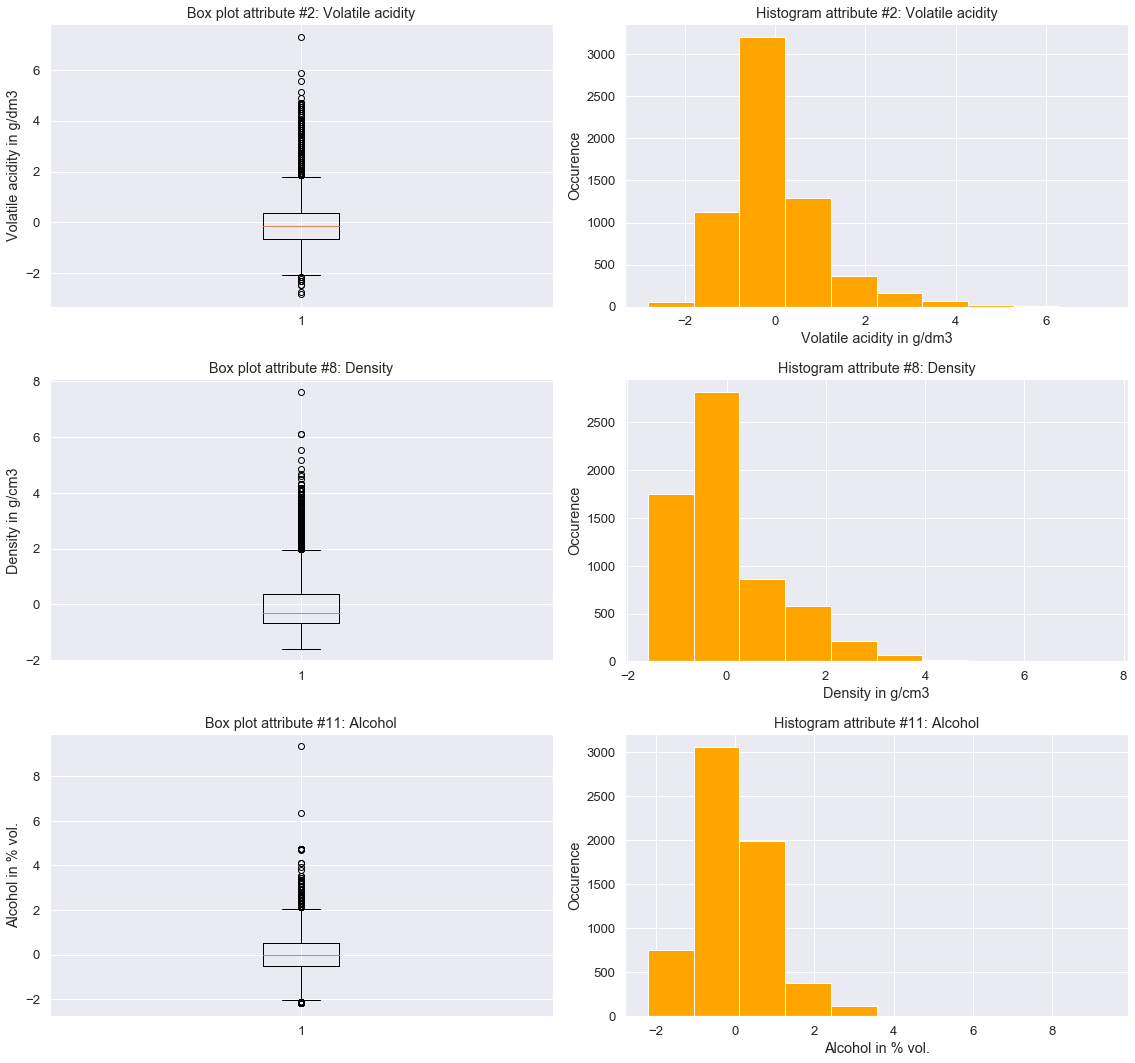

Figure 4: Plots of the wine data with removed outliers and STANDARDIZED data. Distinct difference with the attributes that did not have the outliers removed.


In [88]:
# Ignore deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Usual imports
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # nicer graphics

# Load in the data.
wine_data = scipy.io.loadmat("Data/wine.mat")

# Start rendering the unaltered data in a subplot.
sns.set_style('darkgrid')
sns.set(font_scale=1.2) # Make the font a bit bigger

wine_array = wine_data['X']
attribute_names = wine_data["attributeNames"][0]
attribute_units = ["g/dm3", "g/dm3", "g/dm3", "g/dm3", "g/dm3", "mg/dm3", "mg/dm3", "g/cm3", "pH", "g/dm3", "% vol.", "Score 0-10"]

fig,ax = plt.subplots(len(attribute_names),2,figsize=(16,60)) # create 12 rows of 2 columns of subplots
ax = ax.ravel()

print("Starting to print the unaltered data!")
for column_index in range(0, len(attribute_names)):
    current_column = wine_array[:, column_index]
    figure_index = column_index*2
    
    attribute_name = attribute_names[column_index][0]
    attribute_unit = attribute_units[column_index]
    
    ax[figure_index].boxplot(current_column)
    ax[figure_index].set_title('Box plot attribute #{}: {}'.format(column_index+1, attribute_name))
    ax[figure_index].set_ylabel('{} in {}'.format(attribute_name, attribute_unit))
    
    ax[figure_index + 1].hist(current_column,color='orange') #the first argument tells plt where to place the bars, so range(0,10) just puts them on 0,..,9
    ax[figure_index + 1].set_title('Histogram attribute #{}: {}'.format(column_index+1, attribute_name))
    ax[figure_index + 1].set_xlabel('{} in {}'.format(attribute_name, attribute_unit))
    ax[figure_index + 1].set_ylabel('Occurence')

plt.tight_layout() # makes sure everything fits without overlapping

plt.show()

print('Figure 1: Plots of the unaltered wine data. Many outliers are evident.')
sns.reset_orig()


# Print the standardized unaltered data.
sns.set_style('darkgrid')
sns.set(font_scale=1.2) # Make the font a bit bigger
wine_array_standardized = scipy.stats.zscore(wine_array)

fig,ax = plt.subplots(len(attribute_names),2,figsize=(16,60)) # create 12 rows of 2 columns of subplots
ax = ax.ravel()

print("Starting to print the unaltered standardized data!")
for column_index in range(0, len(attribute_names)):
    current_column = wine_array_standardized[:, column_index]
    figure_index = column_index*2
    
    attribute_name = attribute_names[column_index][0]
    attribute_unit = attribute_units[column_index]
    
    ax[figure_index].boxplot(current_column)
    ax[figure_index].set_title('Box plot attribute #{}: {}'.format(column_index+1, attribute_name))
    ax[figure_index].set_ylabel('{} in {}'.format(attribute_name, attribute_unit))
    
    ax[figure_index + 1].hist(current_column,color='orange') #the first argument tells plt where to place the bars, so range(0,10) just puts them on 0,..,9
    ax[figure_index + 1].set_title('Histogram attribute #{}: {}'.format(column_index+1, attribute_name))
    ax[figure_index + 1].set_xlabel('{} in {}'.format(attribute_name, attribute_unit))
    ax[figure_index + 1].set_ylabel('Occurence')

plt.tight_layout() # makes sure everything fits without overlapping

plt.show()

print('Figure 2: Plots of the unaltered STANDARDIZED wine data. The outliers are exaggerated even more.')
sns.reset_orig()



# Start deleting the outliers.
X_filtered_data = scipy.io.loadmat("Data/wine.mat")
X_filtered_array = X_filtered_data['X']

volatile_acid_non_outlier = X_filtered_array[:, 1] < 2 * 10
X_filtered_array = X_filtered_array[volatile_acid_non_outlier]

density_non_outlier = X_filtered_array[:, 7] < 1 * 10
X_filtered_array = X_filtered_array[density_non_outlier]

alcohol_non_outlier = X_filtered_array[:, 10] < 2 * 10
X_filtered_array = X_filtered_array[alcohol_non_outlier]



# Start printing the graph with altered data.
sns.set_style('darkgrid')
sns.set(font_scale=1.2) # Make the font a bit bigger

interesting_attributes = [1, 7, 10]
fig,ax = plt.subplots(len(interesting_attributes),2,figsize=(16,15)) # create 3 rows of 2 columns of subplots
ax = ax.ravel()

print("Starting to print the altered data of volatile acidity, density and alcohol levels.")
for column_index in range(len(interesting_attributes)):
    current_column = X_filtered_array[:, column_index]
    figure_index = column_index*2
    
    attribute_name = attribute_names[interesting_attributes[column_index]][0]
    attribute_unit = attribute_units[interesting_attributes[column_index]]
    attribute_index = interesting_attributes[column_index]+1
    
    ax[figure_index].boxplot(current_column)
    ax[figure_index].set_title('Box plot attribute #{}: {}'.format(attribute_index, attribute_name))
    ax[figure_index].set_ylabel('{} in {}'.format(attribute_name, attribute_unit))
    
    ax[figure_index + 1].hist(current_column,color='orange') #the first argument tells plt where to place the bars, so range(0,10) just puts them on 0,..,9
    ax[figure_index + 1].set_title('Histogram attribute #{}: {}'.format(attribute_index, attribute_name))
    ax[figure_index + 1].set_xlabel('{} in {}'.format(attribute_name, attribute_unit))
    ax[figure_index + 1].set_ylabel('Occurence')

plt.tight_layout() # makes sure everything fits without overlapping

plt.show()

print('Figure 3: Plots of the wine data with removed outliers. Distinct difference with the attributes that did not have the outliers removed.')
sns.reset_orig()

# Start printing the graph with altered standardized data.
X_filtered_array_standardized = scipy.stats.zscore(X_filtered_array)
sns.set_style('darkgrid')
sns.set(font_scale=1.2) # Make the font a bit bigger

interesting_attributes = [1, 7, 10]
fig,ax = plt.subplots(len(interesting_attributes),2,figsize=(16,15)) # create 3 rows of 2 columns of subplots
ax = ax.ravel()

print("Starting to print the altered STANDARDIZED data of volatile acidity, density and alcohol levels.")
for column_index in range(len(interesting_attributes)):
    current_column = X_filtered_array_standardized[:, column_index]
    figure_index = column_index*2
    
    attribute_name = attribute_names[interesting_attributes[column_index]][0]
    attribute_unit = attribute_units[interesting_attributes[column_index]]
    attribute_index = interesting_attributes[column_index]+1
    
    ax[figure_index].boxplot(current_column)
    ax[figure_index].set_title('Box plot attribute #{}: {}'.format(attribute_index, attribute_name))
    ax[figure_index].set_ylabel('{} in {}'.format(attribute_name, attribute_unit))
    
    ax[figure_index + 1].hist(current_column,color='orange') #the first argument tells plt where to place the bars, so range(0,10) just puts them on 0,..,9
    ax[figure_index + 1].set_title('Histogram attribute #{}: {}'.format(attribute_index, attribute_name))
    ax[figure_index + 1].set_xlabel('{} in {}'.format(attribute_name, attribute_unit))
    ax[figure_index + 1].set_ylabel('Occurence')

plt.tight_layout() # makes sure everything fits without overlapping

plt.show()

print('Figure 4: Plots of the wine data with removed outliers and STANDARDIZED data. Distinct difference with the attributes that did not have the outliers removed.')
sns.reset_orig()

----
**Answer**: When we compare the graphs, from before and after outlier deletion, we can clearly see that when outliers are removed, the boxplots actually become sensible to visualize, because we can finally infer information from it now that they are bigger than a single line. Before the lower and upper quartile as well as the median were barely visible or fall together in just one line.

The histograms obviously change in similar ways, the scale is smaller when outliers are removed and therefore the data gets rendered more accurately, because the smaller numbers don't get clustered in one bar, such as can be seen with density.

----

> 2.1.1b (0.5pts)
Why do we need to standardize the data after removing the outliers? Give the -statistical- reason, not just the practical reason. 

----
**Answer**: If data gets standardized before removing the outliers, the outliers will have a huge impact on the standardization process. When data gets standardized it gets squashed in between a certain bounds using the variance of the data points. If this happens when outliers are still present, the outliers hugely influence the data because variance is defined as "the sum of the squared distances of each term in the distribution from the mean (μ), divided by the number of terms in the distribution (N)" [1]. This means that a high outlier gets squared to be even higher, this statistically explains why we should standardize the data only after removing the outliers.

[1] https://www.sciencebuddies.org/science-fair-projects/science-fair/variance-and-standard-deviation
----

> 2.1.2 (1pt) Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine? Use the correlation coefficients to substantiate your answers. Make sure to use the data where the outliers are removed 
+ *You can calculate the correlation coefficient using the `scipy.stats.pearsonr()` function to measure the strength of association.*

Starting to print the scatterplot data!


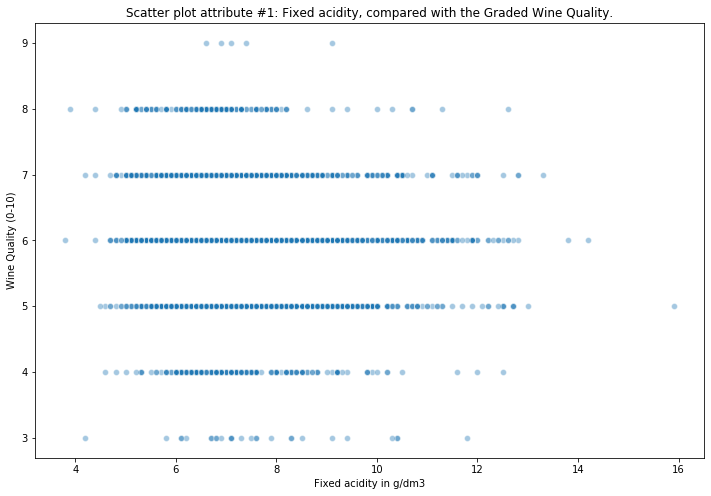

Figure 1: Fixed acidity, compared with the Graded Wine Quality.


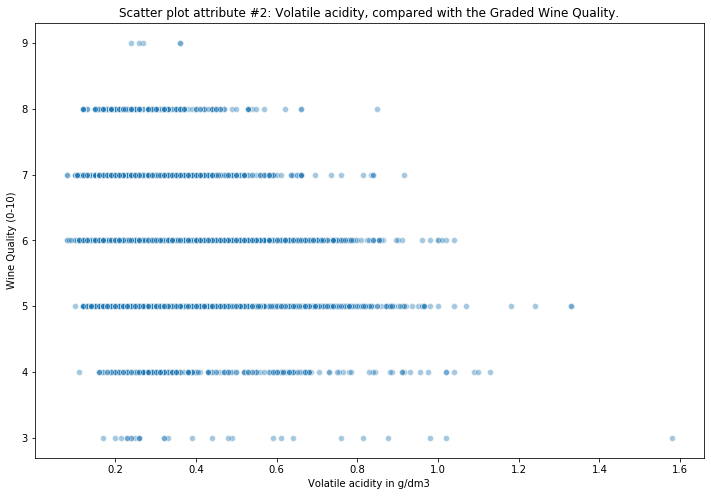

Figure 2: Volatile acidity, compared with the Graded Wine Quality.


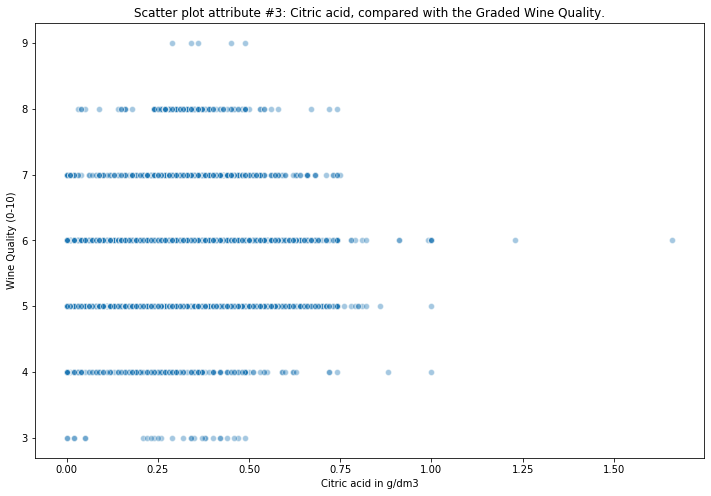

Figure 3: Citric acid, compared with the Graded Wine Quality.


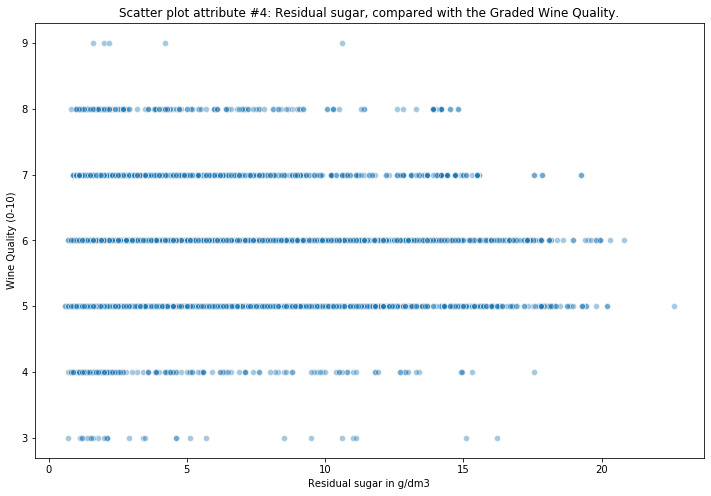

Figure 4: Residual sugar, compared with the Graded Wine Quality.


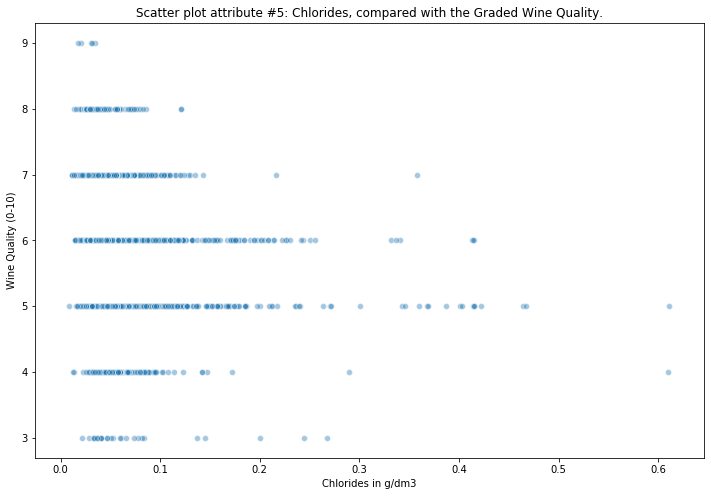

Figure 5: Chlorides, compared with the Graded Wine Quality.


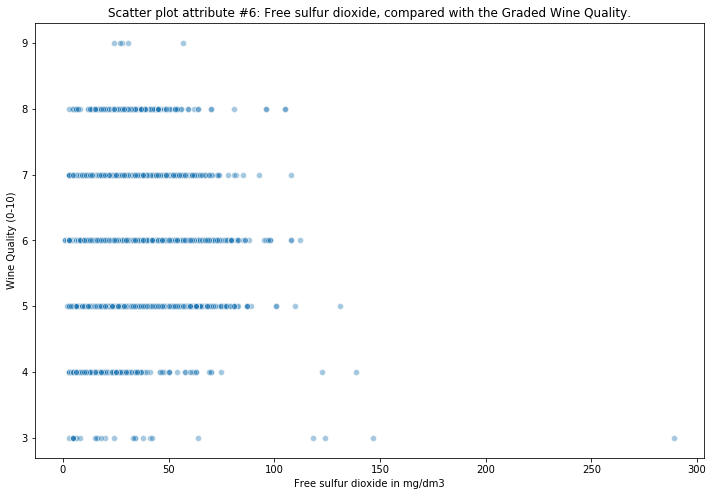

Figure 6: Free sulfur dioxide, compared with the Graded Wine Quality.


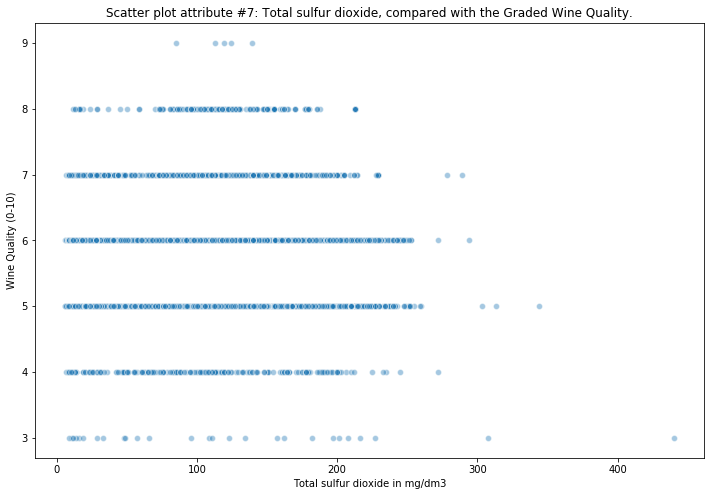

Figure 7: Total sulfur dioxide, compared with the Graded Wine Quality.


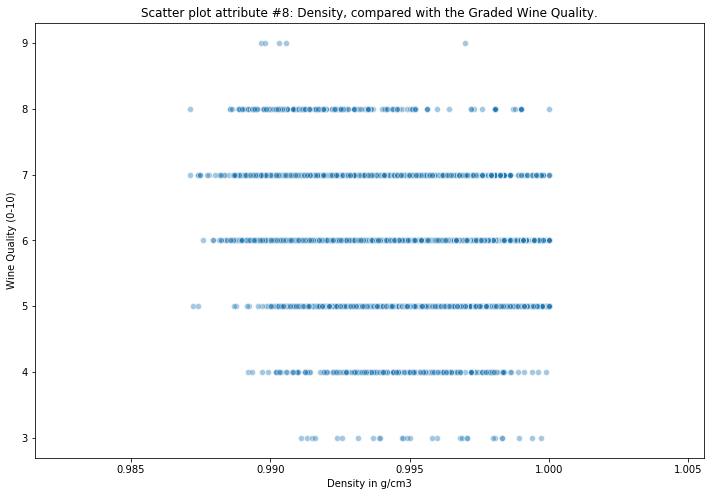

Figure 8: Density, compared with the Graded Wine Quality.


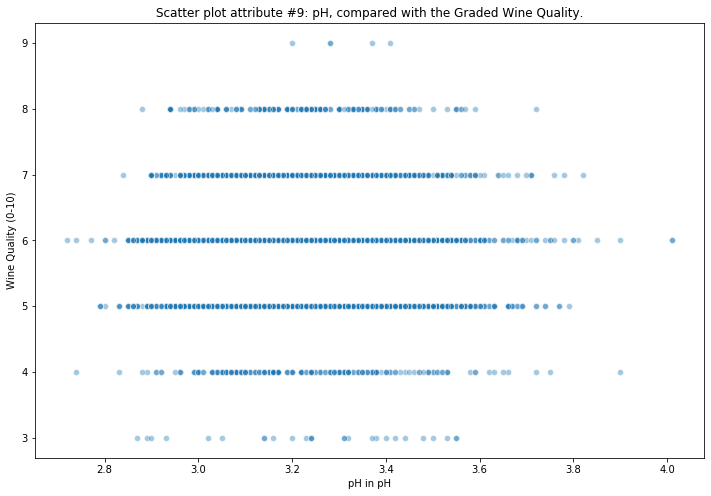

Figure 9: pH, compared with the Graded Wine Quality.


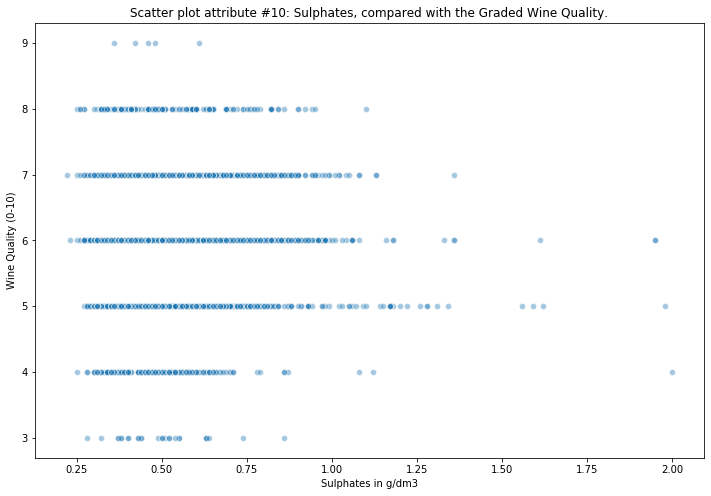

Figure 10: Sulphates, compared with the Graded Wine Quality.


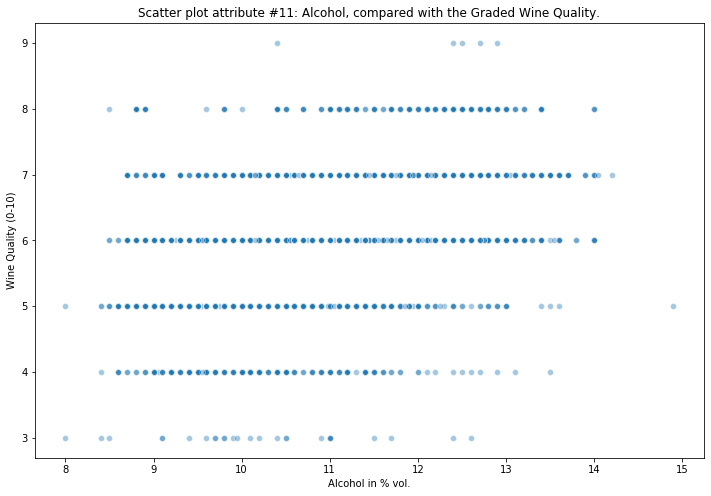

Figure 11: Alcohol, compared with the Graded Wine Quality.

Now printing the correlation coefficients of the attributes with the graded wine data.
Fixed acidity with wine quality: (-0.07668526520453652, 1.0847899728777514e-09).
Volatile acidity with wine quality: (-0.26230590578350776, 1.0724803118587711e-99).
Citric acid with wine quality: (0.0890221181546118, 1.4330992086587045e-12).
Residual sugar with wine quality: (-0.03215392730963386, 0.010676798571678045).
Chlorides with wine quality: (-0.19914164479762572, 2.1198960802505528e-57).
Free sulfur dioxide with wine quality: (0.05516006485585848, 1.1756681578183794e-05).
Total sulfur dioxide with wine quality: (-0.03971034037910721, 0.0016130889003013028).
Density with wine quality: (-0.3196176972872714, 1.0807901465291248e-149).
pH with wine quality: (0.02030807915814118, 0.10690494956698367).
Sulphates with wine quality: (0.03798453783414721, 0.0025581529729373307).
Alcohol with wine quality: (0.4495415274503276, 2.570682201516e-3

In [89]:
# Print the scatterplots
print("Starting to print the scatterplot data!")
graded_column = X_filtered_array[:, 11]
for column_index in range(0, len(attribute_names)-1):
    current_column = X_filtered_array[:, column_index]
    
    attribute_name = attribute_names[column_index][0]
    attribute_unit = attribute_units[column_index]
    
    plt.figure(figsize=(12,8))
    plt.scatter(current_column, graded_column, alpha=0.4, edgecolors='w')
    plt.title('Scatter plot attribute #{}: {}, compared with the Graded Wine Quality.'.format(column_index+1, attribute_name))
    plt.xlabel('{} in {}'.format(attribute_name, attribute_unit))
    plt.ylabel('Wine Quality (0-10)')
    
    plt.show()
    print("Figure {}: {}, compared with the Graded Wine Quality.".format(column_index+1, attribute_name))
    
# Calculate the correlation coefficients
print()
print("Now printing the correlation coefficients of the attributes with the graded wine data.")

graded_wine = X_filtered_array[:, 11]
for column_index in range(len(attribute_names) - 1):
    attribute_name = attribute_names[column_index][0]
    correlation_coefficient = scipy.stats.pearsonr(X_filtered_array[:, column_index], graded_wine)
    print("{} with wine quality: {}.".format(attribute_name, correlation_coefficient))

----
**Answer**: Finding correlations manually is fairly hard to do even with these scatterplots. From our manual investigation, higher alcohol percentages seem to correlate with a higher score though. Also a lower volatile acidity seems to get you a higher score. We will see after calculating the correlation coefficients if these findings hold up.

After doing the automated pearson analysis to get the correlation coefficients, it is indeed true that Alcohol and wine scores are strongly correlated compared to the rest of the data. Volatile acidity also has a relatively strong negative correlation as observed. What surprised us is that density also has a strong negative correlation with the graded wine data. After observing the graph again this seems to be fairly evident, though it is hard to see because the density of the markers isn't very clear. This shows us one of the limitations of scatterplots. When we have a lot of data entries the graphs get crowded and less clear for humans.

----

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 (4pts)
1. Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
2. Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. (remember logical indexing!) 
3. Visualize the first 10 digits as images. (take a look at the example code)
Next, compute the principal components (PCA) of the data matrix. Now, using the PCA model, create a new data matrix $Z$ by projecting $X$ onto the space spanned by the loadings $V$. The new data matrix should have 4 attributes corresponding to PC1-PC4.  Use subplotting to show the digits and their reconstructed counterparts in an orderly manner.
4. Reconstruct the initial data using PC1-PC4 into a new matrix called $W$. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
5. Make a 4-by-4 subplot of scatter plots of each possible combination projection onto PC1 to PC4 (contained in $Z$) against each other. You can leave the diagonal blank.  Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
6. Make a 3-dimensional scatter plot of the projections onto the first three principal components PC1-PC3 (contained in $Z$). Plot elements belonging to different classes in different colors. Add a legend to clarify which digit is shown in which color.
7. What can you conclude from the various scatterplots about the PCs and the way they separate the data?

> **Hints:**
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use **Z** = **Y** $*$ **V**[:,:4] to project the data onto the first four PCs. Don't forget that the $*$ operator does not perform matrix multiplication for numpy arrays!*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *
+ *You can take a look at the example_figure.ipynb notebook to see how you can easily plot multiple classes and color them correspondingly.* 
+ *It is advisable to make a for-loop to generate the 2D scatter plots, this saves a lot of time. It is an important skill to master if you want to easily modify your work later on, for example when correcting mistakes, or when you want to modify each plot in the same manner.* 


Starting to print the first ten images of the filtered handwritten data and their reconstructed counterparts.


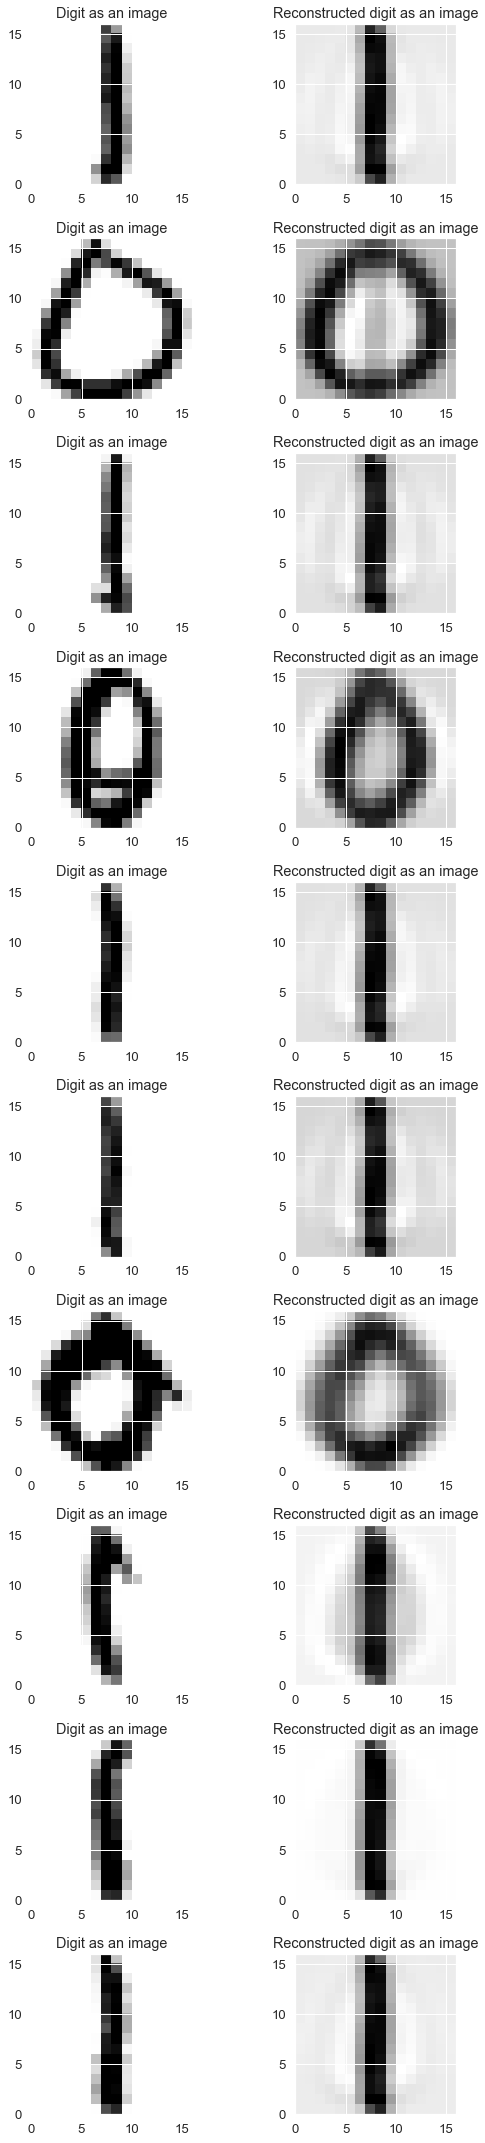

Figure 1: the original and reconstructed image of the dataset using the first 4 principal components.


In [90]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape
import math

# Load Matlab data file to python dict structure
mat_data = loadmat('./Data/zipdata.mat')

# Extract variables of interest
testdata = mat_data['testdata']
traindata = mat_data['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Remove the digits with the class index 2-9 from the data, so only digits belonging to the class 0 and 1 are analyzed.
y_filtered = y < 2
X = X[y_filtered]
y = y[y_filtered]

# Calculate the mean
mean = np.mean(X)

# First center the data
X_centered = X - mean

# Calculate the SVD.
U, S, Vt = np.linalg.svd(X_centered)
V = Vt.T

# Project the dataset on the first 4 Prinicpal Components.
Z = np.dot(X_centered, V[:, :4])

# Reconstruct the data.
W = np.dot(Z, V[:, :4].transpose()) + mean

# Visualize the images and their reconstructed counterpart digits as images.
sns.set(font_scale=1.2) # Make the font a bit bigger

fig,ax = plt.subplots(10,2,figsize=(8,30)) # create 10 rows of 2 columns of subplots
ax = ax.ravel()

print("Starting to print the first ten images of the filtered handwritten data and their reconstructed counterparts.")
for row_index in range(10):
    figure_index = row_index * 2
    current_row = X[row_index,:]
    I = reshape(current_row,(16,16))
    
    ax[figure_index].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    ax[figure_index].set_title('Digit as an image')
    
    current_row = W[row_index,:]
    I = reshape(current_row,(16,16))
    
    ax[figure_index+1].imshow(I, extent=(0,16,0,16), cmap=cm.gray_r)
    ax[figure_index+1].set_title('Reconstructed digit as an image')

plt.tight_layout() # makes sure everything fits without overlapping

plt.show()
print("Figure 1: the original and reconstructed image of the dataset using the first 4 principal components.")

----
**Answer**: When we compare the original data with the reconstructed data we can see that the numbers are very well preserved and seem to be a more generalized version of the actual data. Which is very impressive considering we are only using the first 4 principal components, this is a massive dimensionality reduction and will prove useful for machine learning algorithms as will be shown below.

----

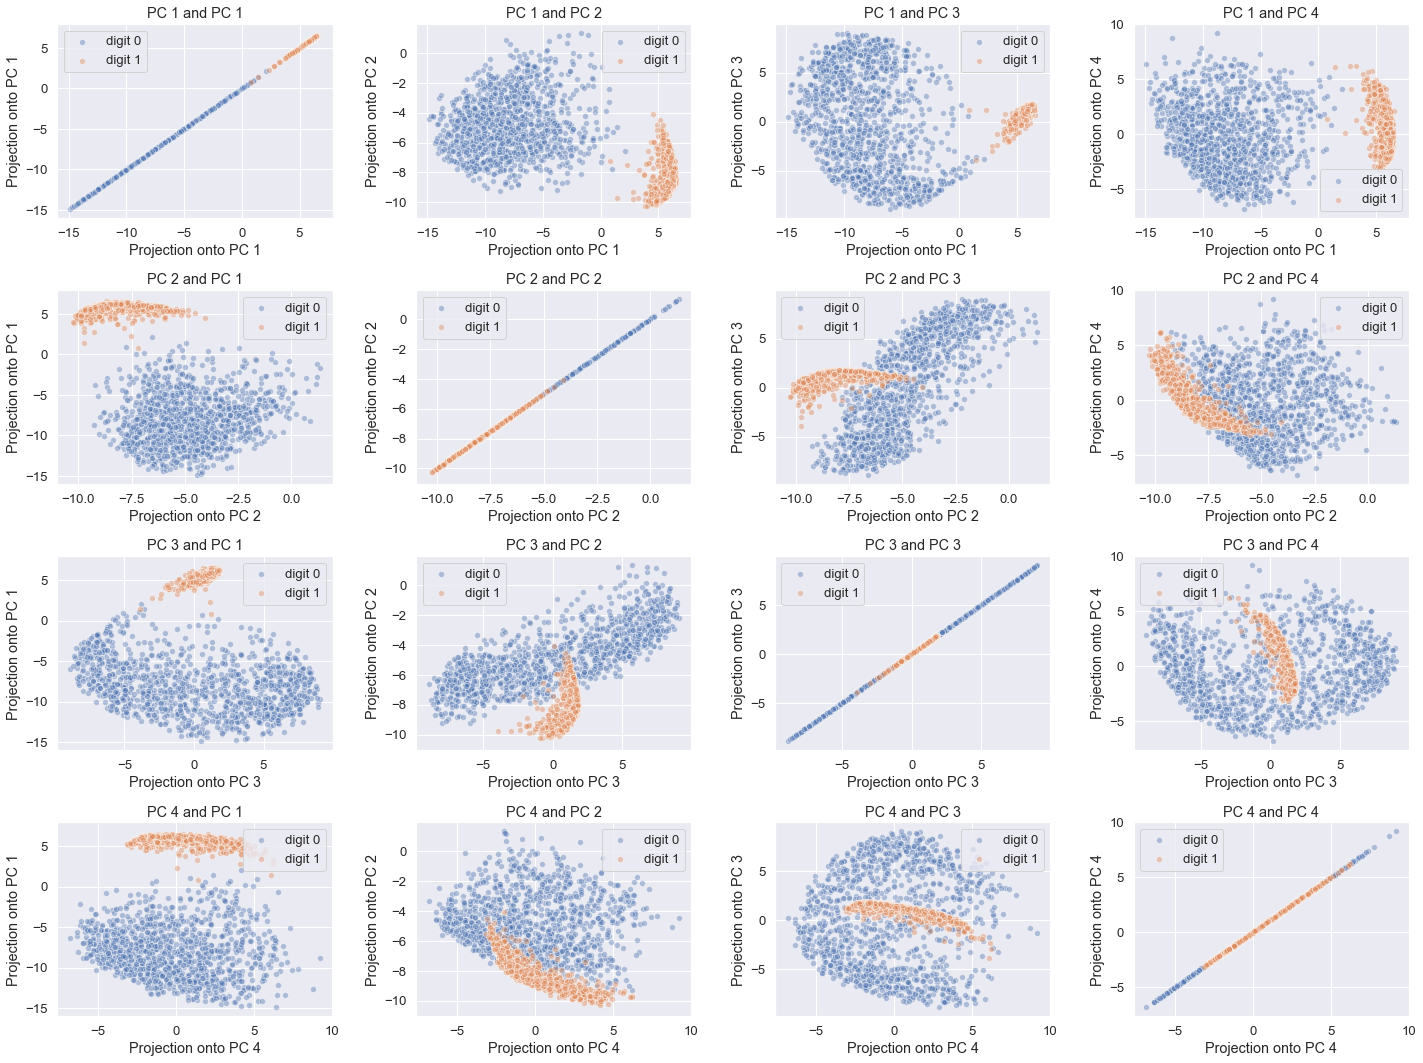

Figure 2: the projections of the first 4 principal components plotted against each other, digits with class 0 plotted in blue, 1 in orange.


In [91]:
import itertools # Needed to calculate the combinations.

# Seperate the data in the two classes
Z_zero = Z[y == 0]
Z_one = Z[y == 1]

PCs = [0, 1, 2, 3] # Indices of the PCs 

# Visualize the images and their reconstructed counterpart digits as images.
sns.set(font_scale=1.2) # Make the font a bit bigger

fig,ax = plt.subplots(4,4,figsize=(20,15)) # create 10 rows of 2 columns of subplots
ax = ax.ravel()

figure_index = 0
for first, second in itertools.product(PCs, repeat = 2):
    ax[figure_index].scatter(Z_zero[:, first], Z_zero[:, second], alpha=0.4, edgecolors='w', label="digit 0")
    ax[figure_index].scatter(Z_one[:, first], Z_one[:, second], alpha=0.4, edgecolors='w', label="digit 1")
    ax[figure_index].set_title('PC {} and PC {}'.format(first+1, second+1))
    ax[figure_index].set_xlabel('Projection onto PC {}'.format(first+1))
    ax[figure_index].set_ylabel('Projection onto PC {}'.format(second+1))
    ax[figure_index].legend()
    
    figure_index = 1 + figure_index
    
plt.tight_layout() # makes sure everything fits without overlapping

plt.show()
print("Figure 2: the projections of the first 4 principal components plotted against each other, digits with class 0 plotted in blue, 1 in orange.")
sns.reset_orig()

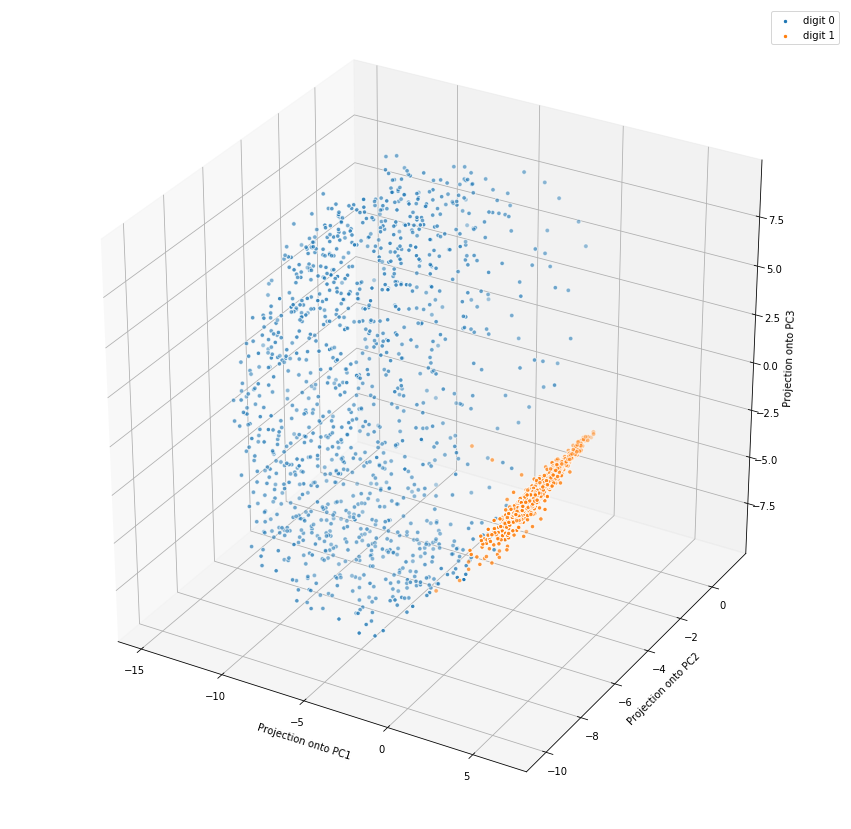

Figure 3: the projections onto the first 3 principal components in a 3d scatterplot, digits with class 0 in blue, digits with class 1 in orange.


In [92]:
# Draw the first 3 PCs as a scatterplot.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Z_zero[:, 0], Z_zero[:, 1], Z_zero[:, 2], edgecolors='w', label='digit 0')
ax.scatter(Z_one[:, 0], Z_one[:, 1], Z_one[:, 2], edgecolors='w', label='digit 1')

ax.set_xlabel('Projection onto PC1')
ax.set_ylabel('Projection onto PC2')
ax.set_zlabel('Projection onto PC3')
plt.legend()

plt.show()
print('Figure 3: the projections onto the first 3 principal components in a 3d scatterplot, digits with class 0 in blue, digits with class 1 in orange.')

----
**Answer**: When we look at the various 2D scatterplots of the principal components, we can see that they are separated very well into two different clusters. 

We can also see that the the 1's are much more tightly clustered, meaning they have less inter-group variance. This might be due to the fact that 1 is a more "simple" digit than 0 as a 1 only consists of 1 line while 0 could be regarded as consisting of 4 lines. This is remarkable because using this knowledge we can train machine learning classifiers to seperate these clusters meaning we can identify the digits using the principal components. Though some PCs like 3 and 4 together have clusters that are hard to see, this is most likely because the explained variance goes down so the labels will be less seperable from there.

The 3d scatter plot also shows these clusters but less clearly. Maybe this would be more visible if we could rotate the plot interactively.

----

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 (0.3pts) A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [93]:
# Define the list with the limb information.
alien_limbs = [2, 3, 6, 8, 11, 18]

# Calculate the mean
mean = np.mean(alien_limbs)
print("The mean of {} is {}.".format(alien_limbs, mean))

# Calculate the standard deviation.
std = np.std(alien_limbs)
print("The standard deviation of {} is {}.".format(alien_limbs, std))

The mean of [2, 3, 6, 8, 11, 18] is 8.0.
The standard deviation of [2, 3, 6, 8, 11, 18] is 5.385164807134504.


> ii. (0.3pts) List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [94]:
# Initialize sample mean lists for N=2 and N=4.
N_two_means, N_four_means = [], []

# List all possible samples of two aliens without replacement.
print("Listing all possible samples of two aliens without replacement and their respective means.")
for sample in itertools.combinations(alien_limbs, 2):
    mean = np.mean(sample) 
    N_two_means.append(mean)
    print("The mean of {} is {}.".format(sample, mean))

print()
    
# List all possible samples of four aliens without replacement.
print("Listing all possible samples of four aliens without replacement and their respective means.")
for sample in itertools.combinations(alien_limbs, 4):
    mean = np.mean(sample) 
    N_four_means.append(mean)
    print("The mean of {} is {}.".format(sample, mean))

Listing all possible samples of two aliens without replacement and their respective means.
The mean of (2, 3) is 2.5.
The mean of (2, 6) is 4.0.
The mean of (2, 8) is 5.0.
The mean of (2, 11) is 6.5.
The mean of (2, 18) is 10.0.
The mean of (3, 6) is 4.5.
The mean of (3, 8) is 5.5.
The mean of (3, 11) is 7.0.
The mean of (3, 18) is 10.5.
The mean of (6, 8) is 7.0.
The mean of (6, 11) is 8.5.
The mean of (6, 18) is 12.0.
The mean of (8, 11) is 9.5.
The mean of (8, 18) is 13.0.
The mean of (11, 18) is 14.5.

Listing all possible samples of four aliens without replacement and their respective means.
The mean of (2, 3, 6, 8) is 4.75.
The mean of (2, 3, 6, 11) is 5.5.
The mean of (2, 3, 6, 18) is 7.25.
The mean of (2, 3, 8, 11) is 6.0.
The mean of (2, 3, 8, 18) is 7.75.
The mean of (2, 3, 11, 18) is 8.5.
The mean of (2, 6, 8, 11) is 6.75.
The mean of (2, 6, 8, 18) is 8.5.
The mean of (2, 6, 11, 18) is 9.25.
The mean of (2, 8, 11, 18) is 9.75.
The mean of (3, 6, 8, 11) is 7.0.
The mean of (3

> iii. (0.3pts) Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [95]:
# First calculate the mean and STD of the sample means of N=2.
mx_two = np.mean(N_two_means)
ox_two = np.std(N_two_means)
print("The mean of the sample means of N=2: {}.".format(mx_two))
print("The standard deviation of the sample means of N=2: {}.".format(ox_two))

print()

# Then do the same for the sample means of N=4.
mx_four = np.mean(N_four_means)
ox_four = np.std(N_four_means)
print("The mean of the sample means of N=4: {}.".format(mx_four))
print("The standard deviation of the sample means of N=4: {}.".format(ox_four))

The mean of the sample means of N=2: 8.0.
The standard deviation of the sample means of N=2: 3.40587727318528.

The mean of the sample means of N=4: 8.0.
The standard deviation of the sample means of N=4: 1.70293863659264.


> iv. Verify the Central Limit Theorem: (i) (0.1pts) compare the population
mean with the mean of both sample means; (ii) (0.2pts) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [96]:
from math import sqrt

# Is the STD of the sample means approximately equal to the STD of the population divided by the square root of the sample size?
ox_two_approximated = std/sqrt(2)
ox_four_approximated = std/sqrt(4)

print("The approximated STD of the sample means with N=2 is {} compared to the previously calculated {}.".format(ox_two_approximated, ox_two))
print("The approximated STD of the sample means with N=4 is {} compared to the previously calculated {}.".format(ox_four_approximated, ox_four))

print()

# Better approximation for small populations.
M = len(alien_limbs)
ox_two_better = std/sqrt(2) * sqrt((M - 2)/(M - 1))
ox_four_better = std/sqrt(4) * sqrt((M - 4)/(M - 1))

print("The better approximated STD of the sample means with N=2 is {} compared to the previously calculated {}.".format(ox_two_better, ox_two))
print("The better approximated STD of the sample means with N=4 is {} compared to the previously calculated {}.".format(ox_four_better, ox_four))

The approximated STD of the sample means with N=2 is 3.807886552931954 compared to the previously calculated 3.40587727318528.
The approximated STD of the sample means with N=4 is 2.692582403567252 compared to the previously calculated 1.70293863659264.

The better approximated STD of the sample means with N=2 is 3.40587727318528 compared to the previously calculated 3.40587727318528.
The better approximated STD of the sample means with N=4 is 1.70293863659264 compared to the previously calculated 1.70293863659264.


----
**Answer**:

*(i)*: The mean of the entire population is the same as the mean of N=2 and N=4 sample means we calculated, namely: 8.0.

*(ii)*: According to the code sketch above the first formula is pretty off, but the better approximation for the small sample size seems to be very accurate, almost to the dot.

----

> v. (0.3pts) Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

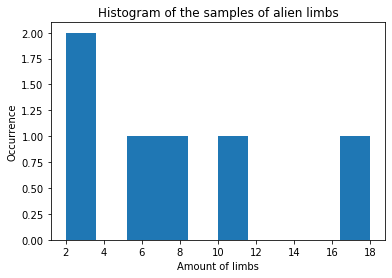

Figure 1: the amount of alien limbs plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per limb in this data.


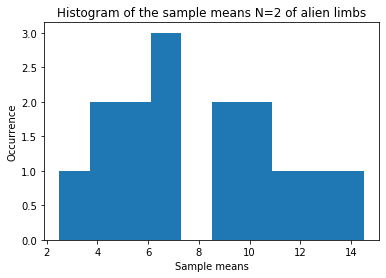

Figure 2: the amount of sample means with sample size N=2 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


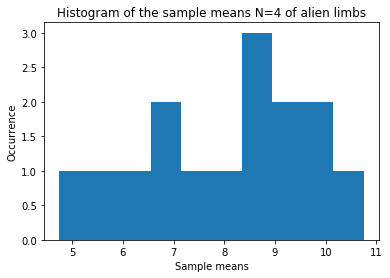

Figure 3: the amount of sample means with sample size N=4 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


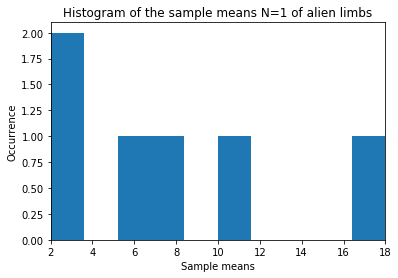

Figure 4: the amount of sample means with sample size N=1 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


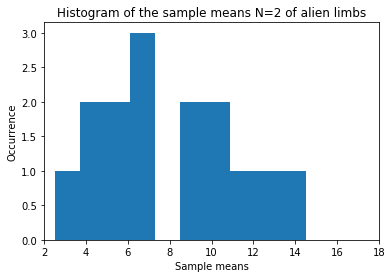

Figure 5: the amount of sample means with sample size N=2 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


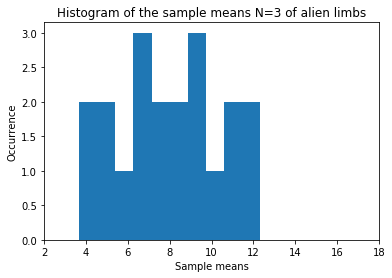

Figure 6: the amount of sample means with sample size N=3 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


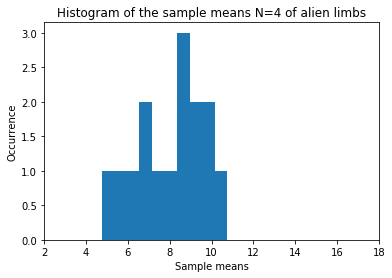

Figure 7: the amount of sample means with sample size N=4 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


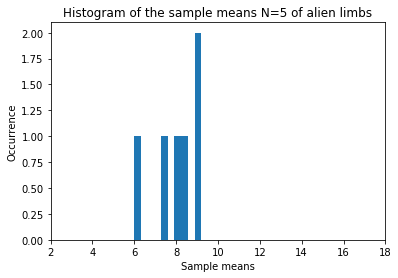

Figure 8: the amount of sample means with sample size N=5 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


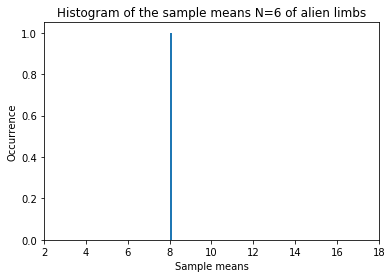

Figure 9: the amount of sample means with sample size N=6 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.


In [97]:
# Plot the population.
plt.hist(alien_limbs)
plt.title("Histogram of the samples of alien limbs")
plt.xlabel("Amount of limbs")
plt.ylabel("Occurrence")
plt.show()
print("Figure 1: the amount of alien limbs plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per limb in this data.")

# Plot the N=2.
plt.hist(N_two_means)
plt.title("Histogram of the sample means N=2 of alien limbs")
plt.xlabel("Sample means")
plt.ylabel("Occurrence")
plt.show()
print("Figure 2: the amount of sample means with sample size N=2 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.")

# Plot the N=4.
plt.hist(N_four_means)
plt.title("Histogram of the sample means N=4 of alien limbs")
plt.xlabel("Sample means")
plt.ylabel("Occurrence")
plt.show()
print("Figure 3: the amount of sample means with sample size N=4 plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.")

# Plot all sample means with variable N.
sample_means = []
for N in range(1, len(alien_limbs)+1):
    for sample in itertools.combinations(alien_limbs, N):
        mean = np.mean(sample) 
        sample_means.append(mean)
    plt.hist(sample_means)
    plt.title("Histogram of the sample means N={} of alien limbs".format(N))
    plt.xlabel("Sample means")
    plt.ylabel("Occurrence")
    plt.xlim(min(alien_limbs), max(alien_limbs))
    plt.show()
    print("Figure {}: the amount of sample means with sample size N={} plotted in a histogram on the x-axis, on the y-axis we see the amount of ocurrences per sample mean in this data.".format(N+3, N))
    sample_means = []

----
**Answer**: The shape of the histogram when the size of N increases, converges to the population mean, as can be seen in figure 9 of N=6 (and the figures leading up to that). This makes sense because the samples will approach the full population with a large N, consequently yielding the same mean as the population mean. We can also see that as N gets larger but not quite as big as the population mean, the distribution starts to look like a gaussian distribution, which follows the central limit theorem. However, because the population size is so small we do see deviations from the usual gaussian distribution.

----